# Загрузка данных

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
from google.colab import files
files.upload() #this will prompt you to upload the kaggle.json

Mounted at /content/gdrive


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"goshaserbin","key":"1bf5f9b29c4b8aaf933caeda54b78cfa"}'}

In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!kaggle competitions download -c spring-2023-property-prices
!unzip spring-2023-property-prices.zip

  0% 0.00/2.68M [00:00<?, ?B/s]
100% 2.68M/2.68M [00:00<00:00, 125MB/s]
Archive:  spring-2023-property-prices.zip
  inflating: SampleSubmission.csv    
  inflating: Test.csv                
  inflating: Train.csv               


# Анализ данных и работа с признаками

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

sns.set(style="darkgrid")

In [ ]:
train_data = pd.read_csv("Train.csv")
test_data = pd.read_csv("Test.csv")

In [ ]:
train_data.head()

,id,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,...,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13,price
0,0,2011-1,560,NaN,2,59,3,0,30.0,1.0,...,0,0,0,0,0,0,0,0,0,4510000
1,1,2011-1,667,NaN,10,50,2,1,25.0,NaN,...,0,0,0,0,0,0,0,0,0,13231000
2,2,2011-1,90,0.0,1,48,2,0,25.0,0.0,...,0,0,0,0,0,0,0,0,0,2008000
3,3,2011-1,94,1.0,3,62,3,1,30.0,NaN,...,0,0,0,0,0,0,0,0,0,12680000
4,4,2011-1,232,0.0,3,60,3,0,25.0,NaN,...,0,0,0,0,0,0,0,0,0,3335000


In [ ]:
test_data.head()

,id,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,...,kw4,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13
0,100000,2012-3,459,NaN,1,60,3,1,30.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,100001,2012-3,344,1.0,10,52,2,1,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,100002,2012-3,585,0.0,4,54,3,0,30.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,100003,2012-3,494,NaN,2,52,2,1,25.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,100004,2012-3,622,1.0,9,60,3,1,15.0,NaN,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
del train_data['id']

В трейне даты с 2011 по 2012, а в тесте с 2012 по 2013

In [ ]:
train_data.date.unique()

array(['2011-1', '2011-10', '2011-11', '2011-12', '2011-2', '2011-3',
       '2011-4', '2011-5', '2011-6', '2011-7', '2011-8', '2011-9',
       '2012-1', '2012-10', '2012-11', '2012-12', '2012-2', '2012-3'],
      dtype=object)

In [ ]:
test_data.date.unique()

array(['2012-3', '2012-4', '2012-5', '2012-6', '2012-7', '2012-8',
       '2012-9', '2013-1', '2013-10', '2013-11', '2013-12', '2013-2',
       '2013-3', '2013-4', '2013-5', '2013-6', '2013-7', '2013-8',
       '2013-9'], dtype=object)

Можно было бы отсортировать все даты по средней стоимости жилья в этот период и каждой дате сопоставить число - позицию в отсортированном списке. Но поскольку в тесте присутствуют даты, которых нет в трейне, то делать так нелогично. Можно посмотреть на зависимость цены жилья от даты

In [ ]:
train_data.date=train_data.date.astype("datetime64[ns]")
test_data.date=test_data.date.astype("datetime64[ns]")

<Axes: xlabel='date'>

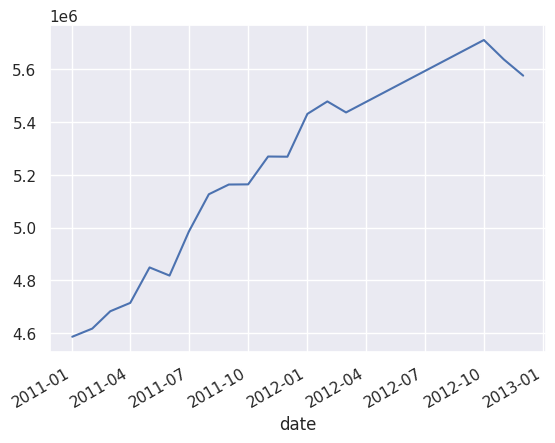

In [ ]:
train_data.groupby('date')['price'].mean().plot(x = 'date', y = 'price')

Видно что со временем цены растут. Можно сказать что линейно. Можно попробовать заменить дату на число - количество месяцев, прошедших, например, с 2010-12-31

In [ ]:
start_date = pd.to_datetime('2010-12-31')

def months_since_start(date):
    return (date.year - start_date.year) * 12 + (date.month - start_date.month)

train_data['date'] = train_data['date'].apply(months_since_start)
test_data['date'] = test_data['date'].apply(months_since_start)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        100000 non-null  int64  
 1   street_id   100000 non-null  int64  
 2   build_tech  70265 non-null   float64
 3   floor       100000 non-null  int64  
 4   area        100000 non-null  int64  
 5   rooms       100000 non-null  int64  
 6   balcon      100000 non-null  int64  
 7   metro_dist  95104 non-null   float64
 8   g_lift      70008 non-null   float64
 9   n_photos    100000 non-null  int64  
 10  kw1         100000 non-null  int64  
 11  kw2         100000 non-null  int64  
 12  kw3         100000 non-null  int64  
 13  kw4         100000 non-null  int64  
 14  kw5         100000 non-null  int64  
 15  kw6         100000 non-null  int64  
 16  kw7         100000 non-null  int64  
 17  kw8         100000 non-null  int64  
 18  kw9         100000 non-null  int64  
 19  kw1

Номера улиц в трейне и тесте совпадают

In [ ]:
set(train_data.street_id.unique()) == set(test_data.street_id.unique())

True

Улица влияет на стоимость жилья

In [ ]:
train_data.groupby('street_id')['price'].mean().sort_values()

street_id
387    1.253659e+06
499    1.273598e+06
105    1.386078e+06
535    1.412810e+06
99     1.574197e+06
           ...     
287    1.390176e+07
286    1.394396e+07
430    1.608498e+07
94     1.658026e+07
186    1.944087e+07
Name: price, Length: 672, dtype: float64

Заменим id улицы на ее позицию в массиве, упорядоченном по возрастанию средней стоимости жилья на этой улицы

In [ ]:
map_dict = train_data.groupby('street_id')['price'].mean().sort_values()
train_data['street_id'] = train_data['street_id'].replace(map_dict.index, np.arange(map_dict.size))
test_data['street_id'] = test_data['street_id'].replace(map_dict.index, np.arange(map_dict.size))

In [ ]:
from sklearn.model_selection import train_test_split
y = train_data["price"]
X = train_data.drop(columns=["price"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

X_validation = test_data.drop(columns=["id"])

Работа с пропусками

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
#imputer=KNNImputer(n_neighbors=1, weights='uniform')
imputer =  SimpleImputer(strategy = 'mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)
X_validation = imputer.transform(X_validation)

# Модели

In [ ]:
from sklearn.metrics import auc, f1_score, accuracy_score, roc_auc_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
def print_metrics(y_test, ans):
    print("MAE ~", np.round(mean_absolute_error(y_test, ans), 4))

## Base line

In [ ]:
print("train: ", end='')
train_ans = np.full(y_train.size, y_train.median())
print_metrics(y_train, train_ans)

print("test:  ", end='')
test_ans = np.full(y_test.size, y_train.median())
print_metrics(y_test, test_ans)

train: MAE ~ 2551896.6143
test:  MAE ~ 2587537.5


## Linear Model

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Lasso()
model.fit(X_train_scaled, y_train)

print("train: ", end='')
train_ans = model.predict(X_train_scaled)
print_metrics(y_train, train_ans)

print("test:  ", end='')
test_ans = model.predict(X_test_scaled)
print_metrics(y_test, test_ans)

train: MAE ~ 1310031.6625
test:  MAE ~ 1326837.5568


In [ ]:
def show_weights(features, weights):
    sorted_weights = sorted(zip(weights, features), reverse=True)
    weights = [x[0] for x in sorted_weights]
    features = [x[1] for x in sorted_weights]
    sns.barplot(y=features, x=weights)

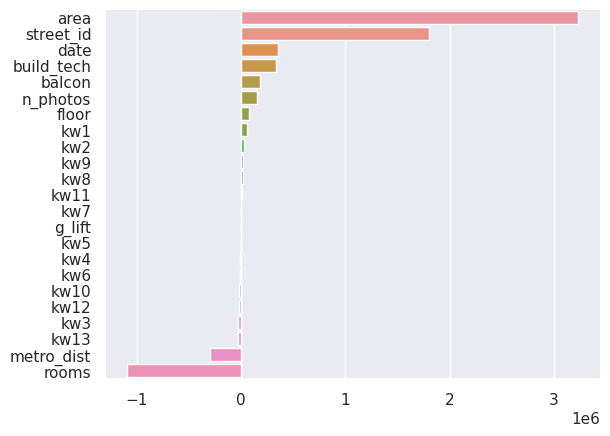

In [ ]:
show_weights(train_data.columns, model.coef_)

In [ ]:
lasso_zeros = np.sum(model.coef_ == 0)
print("Zero weights in Lasso:", lasso_zeros)

Zero weights in Lasso: 0


<Axes: xlabel='price', ylabel='Density'>

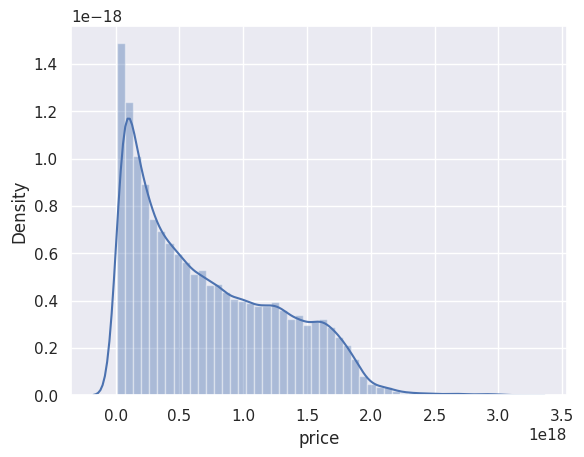

In [ ]:
error = (y_train - model.predict(X_train)) ** 2
sns.distplot(error)

Попробуем убрать данные с большой ошибкой

In [ ]:
X_without_errors = X_train_scaled[error < np.quantile(error, 0.95)]
y_without_errors = y_train[error < np.quantile(error, 0.95)]
model = Lasso()
model.fit(X_without_errors, y_without_errors)

print("train: ", end='')
train_ans = model.predict(X_train_scaled)
print_metrics(y_train, train_ans)

print("test:  ", end='')
test_ans = model.predict(X_test_scaled)
print_metrics(y_test, test_ans)

train: MAE ~ 1290196.2079
test:  MAE ~ 1310840.7838


 ## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(warm_start=True)
model.fit(X_train, y_train)

print("train: ", end='')
train_ans = model.predict(X_train)
print_metrics(y_train, train_ans)

print("test:  ", end='')
test_ans = model.predict(X_test)
print_metrics(y_test, test_ans)

train: MAE ~ 339818.5474
test:  MAE ~ 916812.1138


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(warm_start=True, n_estimators = 250,n_jobs=3,min_samples_leaf=5,max_depth=70)
model.fit(X_train, y_train)

print("train: ", end='')
train_ans = model.predict(X_train)
print_metrics(y_train, train_ans)

print("test:  ", end='')
test_ans = model.predict(X_test)
print_metrics(y_test, test_ans)

train: MAE ~ 641591.0628
test:  MAE ~ 910251.0424


submit

In [ ]:
model.predict(X_validation)
test_data['price'] = model.predict(X_validation)
test_data[["id", "price"]].to_csv("randomForestDefault.csv", index=False)

Подбор гиперпараметров

In [ ]:
from sklearn.model_selection import StratifiedKFold,GridSearchCV
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
parameters = {'max_features': [1, 5, 6],
              'min_samples_leaf': [1, 3, 5, 7],
              'max_depth': [5, 10, 15, 20, 30, 50]}
rfr = RandomForestRegressor(random_state=42,
                             n_jobs=3, oob_score=True)
gcv = GridSearchCV(rfr, parameters, n_jobs=3, cv=skf, verbose=1)
gcv.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(n_jobs=3, oob_score=True,
                                             random_state=42),
             n_jobs=3,
             param_grid={'max_depth': [5, 10, 15, 20, 30, 50],
                         'max_features': [1, 5, 6],
                         'min_samples_leaf': [1, 3, 5, 7]},
             verbose=1)

In [ ]:
gcv.best_estimator_

RandomForestRegressor(max_depth=30, max_features=6, n_jobs=3, oob_score=True,
                      random_state=42)

Best n_estimators = 150.0000


Text(0, 0.5, 'CV score')

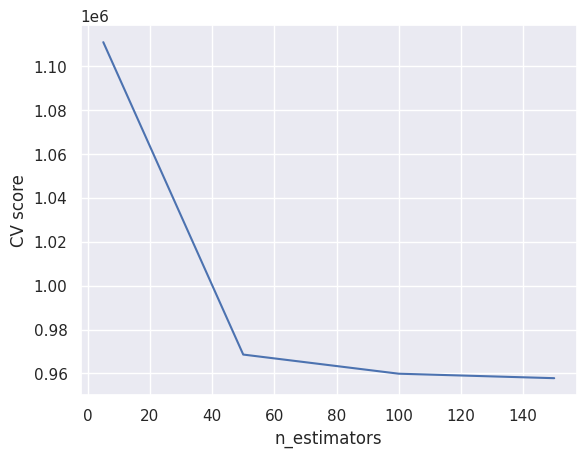

In [ ]:
from sklearn.model_selection import GridSearchCV

estimators = [5,50,100, 150]
searcher = GridSearchCV(gcv.best_estimator_, [{"n_estimators": estimators}], scoring="neg_mean_absolute_error")
searcher.fit(X_train, y_train)

best_estimators = searcher.best_params_["n_estimators"]
print("Best n_estimators = %.4f" % best_estimators)

plt.plot(estimators, -searcher.cv_results_["mean_test_score"])
plt.xlabel("n_estimators")
plt.ylabel("CV score")

Попробуем сначала обучить линейную модель на ключевых словах

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train[:,-13:], y_train)

print("train: ", end='')
train_ans = ridge.predict(X_train[:,-13:])
print_metrics(y_train, train_ans)

print("test:  ", end='')
test_ans = ridge.predict(X_test[:,-13:])
print_metrics(y_test, test_ans)

train: MAE ~ 2683895.6585
test:  MAE ~ 2698206.0653


И потом обучить лсучайный лес на оставшихся признаках + предсказании линейной модели

In [ ]:
from sklearn.ensemble import RandomForestRegressor

newX_train = np.hstack((X_train[:,:-13], ridge.predict(X_train[:,-13:]).reshape(-1, 1)))
newX_test = np.hstack((X_test[:,:-13], ridge.predict(X_test[:,-13:]).reshape(-1, 1)))

model = RandomForestRegressor()
model.fit(newX_train, y_train)

print("train: ", end='')
train_ans = model.predict(newX_train)
print_metrics(y_train, train_ans)

print("test:  ", end='')
test_ans = model.predict(newX_test)
print_metrics(y_test, test_ans)

train: MAE ~ 341076.864
test:  MAE ~ 919395.1175


## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(warm_start=True,min_samples_leaf=4,n_estimators = 250,learning_rate=0.2)
gbr.fit(X_train, y_train)

print("train: ", end='')
train_ans = gbr.predict(X_train)
print_metrics(y_train, train_ans)

print("test:  ", end='')
test_ans = gbr.predict(X_test)
print_metrics(y_test, test_ans)

train: MAE ~ 837344.086
test:  MAE ~ 862966.7255


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr2 = GradientBoostingRegressor(warm_start=True,min_samples_leaf=4,n_estimators = 285,learning_rate=0.32)
gbr2.fit(X_train, y_train)

print("train: ", end='')
train_ans = gbr2.predict(X_train)
print_metrics(y_train, train_ans)

print("test:  ", end='')
test_ans = gbr2.predict(X_test)
print_metrics(y_test, test_ans)

train: MAE ~ 767717.4515
test:  MAE ~ 804543.285


submit

In [ ]:
X_TRAIN = np.vstack((X_train, X_test))
Y_TRAIN = np.hstack((y_train,y_test))
gbr = GradientBoostingRegressor(warm_start=True,min_samples_leaf=4,n_estimators = 300,learning_rate=0.32)
gbr.fit(X_TRAIN, Y_TRAIN)
print("train: ", end='')
train_ans = gbr.predict(X_TRAIN)
print_metrics(Y_TRAIN, train_ans)

train: MAE ~ 772930.5622


In [ ]:
test_data['price'] = gbr.predict(X_validation)
test_data[["id", "price"]].to_csv("GBDefault.csv", index=False)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr2 = GradientBoostingRegressor(warm_start=True,min_samples_leaf=4,n_estimators = 300,learning_rate=0.4,max_depth=5, loss='huber')
gbr2.fit(X_train, y_train)

print("train: ", end='')
train_ans = gbr2.predict(X_train)
print_metrics(y_train, train_ans)

print("test:  ", end='')
test_ans = gbr2.predict(X_test)
print_metrics(y_test, test_ans)

train: MAE ~ 552719.5474
test:  MAE ~ 659378.2442


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(warm_start=True,min_samples_leaf=4,n_estimators = 320,learning_rate=0.37,max_depth=5, loss='huber')
gbr.fit(X_train, y_train)

print("train: ", end='')
train_ans = gbr.predict(X_train)
print_metrics(y_train, train_ans)

print("test:  ", end='')
test_ans = gbr.predict(X_test)
print_metrics(y_test, test_ans)

train: MAE ~ 553245.9994
test:  MAE ~ 655702.2852


submit

In [ ]:
gbr.fit(X_TRAIN, Y_TRAIN)
print("train: ", end='')
train_ans = gbr.predict(X_TRAIN)
print_metrics(Y_TRAIN, train_ans)

train: MAE ~ 583982.8851


In [ ]:
test_data['price'] = gbr.predict(X_validation)
test_data[["id", "price"]].to_csv("GBExtended.csv", index=False)